In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [76]:
!pip install kaggle

In [77]:
!chmod 600 /root/.kaggle/kaggle.json

In [78]:
!kaggle datasets list -s 278k

ref                                                          title                                        size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  -------------------------------------------  ----  -------------------  -------------  ---------  ---------------  
abdullahorzan/moodify-dataset                                278k Emotion Labeled Spotify Songs           28MB  2023-05-31 01:15:32            931         34  0.8235294        
aestheteaman01/278k-us-wildfires-due-to-lightning-2004-2015  US Wildfires due to Lightning (2004 - 2015)   6MB  2021-08-22 04:40:26            511         27  0.9117647        
viktoriiashkurenko/278k-spotify-songs                        6K Spotify Playlists                         42GB  2023-05-18 17:11:45           1510         41  1.0              


In [79]:
!kaggle datasets download -d abdullahorzan/moodify-dataset

moodify-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [80]:
!unzip -q moodify-dataset.zip
!ls

replace 278k_labelled_uri.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 278k_labelled_uri.csv	sample_data		save_mnist_at_3.keras  save_mnist_at_7.keras
278k_song_labelled.csv	save_mnist_at_10.keras	save_mnist_at_4.keras  save_mnist_at_8.keras
model.png		save_mnist_at_1.keras	save_mnist_at_5.keras  save_mnist_at_9.keras
moodify-dataset.zip	save_mnist_at_2.keras	save_mnist_at_6.keras


In [81]:
music_emo = pd.read_csv("./278k_song_labelled.csv", index_col = 0)
music_emo = music_emo.drop(['spec_rate','duration (ms)'], axis=1)
music_emo.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,labels
0,0.611,0.614,-8.815,0.0672,0.0169,0.000794,0.7530,0.520,128.050,2
1,0.638,0.781,-6.848,0.0285,0.0118,0.009530,0.3490,0.250,122.985,1
2,0.560,0.810,-8.029,0.0872,0.0071,0.000008,0.2410,0.247,170.044,1
3,0.525,0.699,-4.571,0.0353,0.0178,0.000088,0.0888,0.199,92.011,0
4,0.367,0.771,-5.863,0.1060,0.3650,0.000001,0.0965,0.163,115.917,1


In [82]:
#number of classes is 3

#checking dimensions
music_emo.shape
#music_emo.describe()

(277938, 10)

<Axes: >

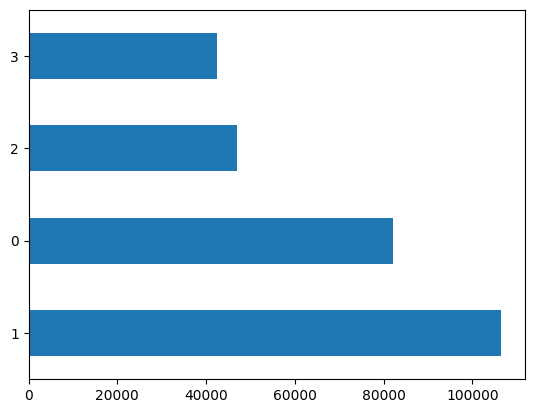

In [83]:
#visualize how many people have improved their mental health
music_emo["labels"].value_counts().plot(kind= 'barh')


In [84]:
print(music_emo.columns)

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'labels'],
      dtype='object')


In [85]:
elements = music_emo.iloc[:, :9]
elements.head()

mood = music_emo["labels"]
mood.head()

0    2
1    1
2    1
3    0
4    1
Name: labels, dtype: int64

In [86]:
print(elements.shape)

print(mood.shape)


(277938, 9)
(277938,)


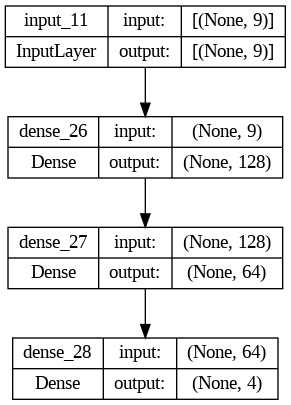

In [87]:
#creating a naive model based on the music effects and the mixture of the frequencies

#first import the necessary modules
import tensorflow as tf # Tensorflow is a neural network and deep neural network library
from tensorflow import keras # Keras is a high-level wrapper that makes working with tensorflow easier
from tensorflow.keras import layers # Layers contains different types of layers such as Dense, Convolutional, Recurrent
from sklearn.model_selection import train_test_split

#split the dataset into training and test
x_train, x_test, y_train, y_test = train_test_split(elements, mood, test_size=0.3)

from sklearn.preprocessing import MinMaxScaler

# define a new scaler:
x_scaler = MinMaxScaler()

# fit the normalization on the training set:
x_scaler.fit(x_train)

# then create new and normalized training/test sets:
x_train_norm = x_scaler.transform(x_train)
x_test_norm = x_scaler.transform(x_test)


#a simple 2-layer model using Keras
def make_model_dense(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    # Entry block
    # Write dense layers with non-linear activation here.
    if num_classes == 2:
        units = 1
    else:
        units = num_classes # num_class would be different for MNIST.

    outputs = layers.Dense(128, activation="relu")(inputs)
    outputs2 = layers.Dense(64, activation="leaky_relu")(outputs)
    outputs3= layers.Dense(units, activation="softmax")(outputs2)

    return keras.Model(inputs, outputs3)

model = make_model_dense(input_shape= 9, num_classes=4)
keras.utils.plot_model(model, show_shapes=True)

In [88]:
y_train.dtypes

dtype('int64')

Epoch 1/10
1043/1043 [==============================] - 6s 4ms/step - loss: 0.2684 - accuracy: 0.8882 - val_loss: 0.2666 - val_accuracy: 0.8900
Epoch 2/10
1043/1043 [==============================] - 2s 2ms/step - loss: 0.2646 - accuracy: 0.8890 - val_loss: 0.2652 - val_accuracy: 0.8892
Epoch 3/10
1043/1043 [==============================] - 2s 2ms/step - loss: 0.2655 - accuracy: 0.8889 - val_loss: 0.2641 - val_accuracy: 0.8900
Epoch 4/10
1043/1043 [==============================] - 3s 3ms/step - loss: 0.2617 - accuracy: 0.8901 - val_loss: 0.2771 - val_accuracy: 0.8861
Epoch 5/10
1043/1043 [==============================] - 2s 2ms/step - loss: 0.2602 - accuracy: 0.8902 - val_loss: 0.2676 - val_accuracy: 0.8873
Epoch 6/10
1043/1043 [==============================] - 2s 2ms/step - loss: 0.2575 - accuracy: 0.8911 - val_loss: 0.2777 - val_accuracy: 0.8842
Epoch 7/10
1043/1043 [==============================] - 2s 2ms/step - loss: 0.2540 - accuracy: 0.8943 - val_loss: 0.2596 - val_accuracy:

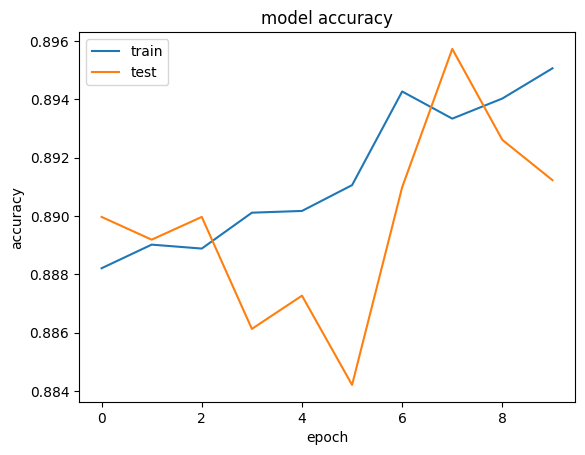

In [ ]:
epochs = 10

callbacks = [
    #instruction on where to save the checkpoint, during inf we can load the checkpoint and run the inference
    keras.callbacks.ModelCheckpoint("save_mnist_at_{epoch}.keras"),
    #a technique to avoid overfitting
    #stop the training once the validation accuracy plateaus
    keras.callbacks.EarlyStopping(
    monitor="val_loss",
    #waiting for the epoch where the validation accuracy is no longer decreasing
    patience=epochs, # You can change it
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)
]

#using sparse version of categorical crossentropy due to a mismatch in the dimensions of x_train and y_train
model.compile(
    optimizer='adam',
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

history = model.fit(
    x_test_norm,
    y_test,
    epochs=epochs,
    callbacks=callbacks,
    batch_size = 64,
    validation_split=0.2,
)


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test_norm, y_test, batch_size=64)
print("test loss, test acc:", results)

Evaluate on test data
1303/1303 [==============================] - 2s 1ms/step - loss: 0.2852 - accuracy: 0.8806
test loss, test acc: [0.28518497943878174, 0.880597710609436]
